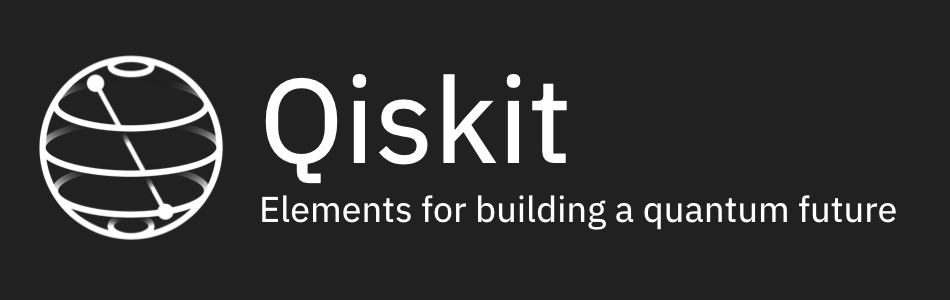

# The IBM Quantum Experience Account

In Qiskit we have an interface for backends and jobs that is useful for running circuits and extending to third-party backends. In this tutorial, we will review the core components of Qiskit’s base backend framework, using the IBM Quantum Experience (IQX) account as an example.

The interface has four main components: the account, providers, backends, and jobs:

- **account**: Gives access to one or more ‘providers’ based on the account's permissions.

- **provider**: Provides access to quantum devices and simulators, collectively called ‘backends’, and additional services tailored to a specific backend instance.

- **backend**: A quantum device or simulator capable of running quantum circuits or pulse schedules.

- **job**: A local reference to a collection of quantum circuits or pulse schedules submitted to a given backend.

<div class="alert alert-block alert-info">
<b>Note:</b> To run the sample code in this tutorial, you'll need to have an <a href="https://qiskit.org/documentation/install.html#access-ibm-quantum-systems">IQX account</a> and have qiskit-ibmq-provider installed. qiskit-ibmq-provider is the interface for accessing IQX services and is automatically installed as part of Qiskit.</div>


## Table of contents

1) [The Account](#account)


2) [The Provider](#provider)


3) [Backends](#backends)
    
    
4) [Jobs](#jobs)


5) [Updating from previous versions](#updating)

## The Account <a name='account'></a>

The Qiskit `IBMQ` account object is the local reference for accessing your IBM Quantum Experience account, and all of the providers, backends, etc, that are available to you.

The `IBMQ` account has functions for handling administrative tasks. The credentials can be saved to disk, or used in a session and never saved.

- `enable_account(TOKEN, HUB, GROUP, PROJECT)`: Enable your account in the current session and optionally specify a default provider to return.
- `save_account(TOKEN, HUB, GROUP, PROJECT)`: Save your account to disk for future use and optionally specify a default provider to return when loading your account.
- `load_account()`: Load account using stored credentials.
- `disable_account()`: Disable your account in the current session.
- `stored_account()`: List the account stored to disk.
- `active_account()`: List the account currently in the session.
- `delete_account()`: Delete the saved account from disk.

A provider offers access to quantum systems, simulators, and additional services. To see all the providers available with your IQX account:

In [1]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q', group='test', project='default')>]

where we have assumed that the user has stored their IQX account information locally ahead of time using `IBMQ.save_account(TOKEN)`. `TOKEN` here is the API token you obtain from your IQX account.

<div class="alert alert-block alert-info">
<b>Note:</b> The use of `provider` instances is the default way of retrieving backends from Qiskit 0.11 onwards - if you have been using earlier versions of Qiskit, check the <a href="#updating">"Updating from previous versions"</a> section for more detailed instructions on updating and using the different options.</div>
</div>

The above example shows two different providers. All `IBMQ` providers are specified by a `hub`, `group`, and `project`. The provider given by `hub='ibm-q', group='open', project='main'` is the provider that gives access to the public IBM Quantum devices available to all IQX users. The second is an example of a provider that is only unlocked for a specific set of users. Members of the IBM Q Network may see one or more providers (with names different than those shown above) depending on the access level granted to them.

To access a given provider one should use the `get_provider()` method of the `IBMQ` account, filtering by `hub`, `group`, or `project`:

In [2]:
IBMQ.get_provider(hub='ibm-q')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
IBMQ.get_provider(group='open')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Finally, as a convenience, calling `IBMQ.load_account()` or `IBMQ.enable_account()` will return the default public provider instance `<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>`.

## The Provider <a name='provider'></a>

All providers inherit from `qiskit.providers.BaseProvider` and implement the methods:

- `backends()`: Returns all backend objects known to the provider.
- `get_backend(NAME)`: Returns the named backend.

Providers associated via your `IBMQ` account provide access to a group of different backends, such as those available through the open IBM Quantum Experience or the IBM Q Network.

Using the public provider instance from above:

In [4]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

Selecting a backend is done by name using the `get_backend(NAME)` method:

In [5]:
backend = provider.get_backend('ibmq_armonk')
backend

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

### Filtering the Backends

You may also optionally filter the set of returned backends, by passing arguments that query the backend’s `configuration`, `status`, or `properties`. The filters are passed by conditions and, for more general filters, you can make advanced functions using a lambda function.

As a first example lets return only those backends that are real quantum devices, and that are currently operational:

In [6]:
provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

You can also filter by the minimum number of qubits the backends must have:

In [7]:
provider.backends(min_num_qubits=5, simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Lastly, show the least busy 5 qubit device (in terms of the number of jobs pending in the queue)

In [8]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(min_num_qubits=5, simulator=False, operational=True)
backend = least_busy(small_devices)
print(backend)

ibmq_belem


The above filters can be combined as desired.

## Backends <a name='backends'></a>

Backends represent either a simulator or a real quantum computer, and are responsible for running quantum circuits and/or pulse schedules and returning results. They have a `run` method which takes in a `qobj` as input, the Qiskit API serialization format, and returns a `BaseJob` object. This object allows asynchronous running of jobs for retrieving results from a backend when the job is completed.


At a minimum, backends use the following methods, inherited from `qiskit.providers.BaseBackend`:

- `provider()`: Returns the provider of the backend.
- `name()`: Returns the name of the backend.
- `status()`: Returns the current status of the backend.
- `configuration()`: Returns the backend configuration.
- `properties()`: Returns the backend properties.
- `run(QOBJ, **kwargs)`: Runs a qobj on the backend.


The `qiskit-ibmq-provider`'s implementation of `BaseBackend` is [`IBMQBackend`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html#qiskit.providers.ibmq.IBMQBackend). It  accepts additional parameters to the `run()` method:

- `job_name`: Custom name to be assigned to the job.
- `job_share_level`: Allows sharing the job at different level.
- `job_tags`: Tags to be assigned to the job.

And supports additional methods:

- `jobs()`: Returns a list of previous jobs executed on this backend through the current provider instance.
- `retrieve_job(JOB_ID)`:  Returns a job by its job ID.
- `defaults()`: Gives a data structure of typical default parameters, if applicable.
- `job_limit()`: Returns the job limit for the backend.
- `remaining_jobs_count()`: Returns the number of remaining jobs that could be submitted to the backend.
- `active_jobs()`: Returns a list of unfinished jobs.

Refer to the [`IBMQBackend`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html#qiskit.providers.ibmq.IBMQBackend) documentation for a complete list of methods.

Lets load up the least busy backend from the `small_devices` filtered above:

In [9]:
backend = least_busy(small_devices)

Some examples using the different methods:

In [10]:
backend.provider()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
backend.name()

'ibmq_belem'

In [12]:
backend.status().to_dict()

{'backend_name': 'ibmq_belem',
 'backend_version': '1.0.14',
 'operational': True,
 'pending_jobs': 3,
 'status_msg': 'active'}

Here we see the name of the backend, the software version it is running, along with its operational status, number of jobs pending in the backends queue, and a more detailed status message.

Next we look at the backend configuration and properties:

In [13]:
backend.configuration().to_dict()

{'backend_name': 'ibmq_belem',
 'backend_version': '1.0.14',
 'n_qubits': 5,
 'basis_gates': ['id', 'rz', 'sx', 'x', 'cx', 'reset'],
 'gates': [{'name': 'id',
   'parameters': [],
   'qasm_def': 'gate id q { U(0, 0, 0) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'rz',
   'parameters': ['theta'],
   'qasm_def': 'gate rz(theta) q { U(0, 0, theta) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'sx',
   'parameters': [],
   'qasm_def': 'gate sx q { U(pi/2, 3*pi/2, pi/2) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'x',
   'parameters': [],
   'qasm_def': 'gate x q { U(pi, 0, pi) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'cx',
   'parameters': [],
   'qasm_def': 'gate cx q0, q1 { CX q0, q1; }',
   'coupling_map': [[0, 1],
    [1, 0],
    [1, 2],
    [1, 3],
    [2, 1],
    [3, 1],
    [3, 4],
    [4, 3]]},
  {'name': 'reset', 'parameters': None, 'qasm_def': None}],
 'local': False,
 'simulator': False,
 'condi

The backend configuration provides some useful information via its attributes, such as `basis_gates`, `coupling_map`, `max_experiments`, `max_shots`, `quantum_volume`, and `simulator`. 

The backend properties contain data that was measured and reported. Let’s see what kind of information is reported for qubit 0.

**Note:** The following example displays the properties of the `SX` gate. Each backend may have different basis gates which may not contain `SX`. 

In [14]:
props = backend.properties()

def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print(f"Qubit {qubit} has a \n"
          f"  - T1 time of {properties.t1(qubit)} microseconds\n"
          f"  - T2 time of {properties.t2(qubit)} microseconds\n"
          f"  - SX gate error of {properties.gate_error('sx', qubit)}\n"
          f"  - SX gate duration of {properties.gate_length('sx', qubit)*ns} nanoseconds\n"
          f"  - resonant frequency of {properties.frequency(qubit) * GHz} GHz")

describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 0.000118798578854076 microseconds
  - T2 time of 8.30176098567665e-05 microseconds
  - SX gate error of 0.0003355394204181594
  - SX gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 4.820326782885405 GHz


To see the last five jobs run on this backend:

In [15]:
ran_job = None
for ran_job in backend.jobs(limit=5):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))

5fb48d2ae4314600192a1c2c JobStatus.DONE
5fb48ce2c76d75001a2089a1 JobStatus.DONE
5fb48ce103cb100019752e28 JobStatus.DONE
5fb48c0de4314600192a1c1c JobStatus.DONE
5fb48b8d130b8000199af33b JobStatus.DONE


A `job` can be retrieved using the `retrieve_job(JOB_ID)` method:

In [16]:
if ran_job is not None:
    job = backend.retrieve_job(ran_job.job_id())

### Backend Service

`qiskit-ibmq-provider` version `0.4` (`Qiskit` version `0.14`) introduced a new class 
[`IBMQBackendService`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackendService.html#qiskit.providers.ibmq.IBMQBackendService). It provides generic backend related services for a provider without requiring a particular backend as input. The main methods it supports are:

- `jobs()`: Returns a list of previously submitted jobs through the current provider instance.
- `retrieve_job(JOB_ID)`:  Returns a job by its job ID.


The backend service is defined as the `backend` attribute of a provider. All of the backends available to this provider are also attributes of the backend service, allowing the backend names to be autocompleted: 

In [17]:
provider.backend.ibmq_armonk

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

To see the last five jobs submitted through this provider, regardless of which backend they ran on:

In [18]:
for ran_job in provider.backend.jobs(limit=5):
    print(str(ran_job.job_id()) + " " + str(ran_job.status()))

5fdccad1c01fec001a47e018 JobStatus.QUEUED
5fdcc5fad4445500193f0072 JobStatus.DONE
5fdcc5f923da0f001acf6f67 JobStatus.DONE
5fdcc5f9d4445500193f0071 JobStatus.DONE
5fdcc41b23da0f001acf6f44 JobStatus.DONE


To retrieve a particular job:

In [19]:
if ran_job is not None:
    job = provider.backend.retrieve_job(ran_job.job_id())

## Jobs <a name='jobs'></a>

Job instances can be thought of as the “ticket” for a submitted job. They find out the execution state at a given point in time (for example, if the job is queued, running, or has failed), and also allow control over the job. They have the following methods:

- `status()`: Returns the status of the job.
- `backend()`: Returns the backend the job was run on.
- `job_id()`: Gets the job_id.
- `cancel()`: Cancels the job.
- `result()`: Gets the results from the circuit run.

Some of the methods that are only available to "IBM Q Job"([`IBMQJob`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.job.IBMQJob.html#qiskit.providers.ibmq.job.IBMQJob)) include:

- `creation_date()`: Gives the date at which the job was created.
- `queue_info()`: Returns queue information for this job, including queue position, estimated start and end time, and dynamic priorities for the hub, group, and project.
- `error_message()`: The error message of failed jobs, if any.
- `name()`: Returns the name assigned to this job.
- `properties()`: Returns the backend properties for this job.
- `time_per_step()`: Returns the time spent for each step (job creation, validation, etc).

Refer to the [`IBMQJob`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.job.IBMQJob.html#qiskit.providers.ibmq.job.IBMQJob) documentation for a complete list of methods.

Now some examples. Let's start with submitting a job:

In [20]:
from qiskit import *
from qiskit.compiler import transpile, assemble

In [21]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

You should first map the circuit using the transpile function and then send it to the backend:

In [22]:
mapped_circuit = transpile(circuit, backend=backend)
job = backend.run(mapped_circuit, shots=1024)

The `status()` method returns the job status and a message:

In [23]:
job.status()

<JobStatus.VALIDATING: 'job is being validated'>

To get a backend object from the job, use the `backend()` method:

In [24]:
backend_temp = job.backend()
backend_temp

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

To get the job_id use the `job_id()` method:

In [25]:
job.job_id()

'5fdccb1ad4445500193f00db'

To get the result from the job, use the `result()` method:

In [26]:
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 24, '001': 53, '010': 28, '011': 56, '100': 26, '101': 801, '110': 13, '111': 23}


If you want to check the creation date, use `creation_date()`:

In [27]:
job.creation_date()

datetime.datetime(2020, 12, 18, 10, 30, 34, 565000, tzinfo=tzlocal())

### Job Manager <a name='job manager'></a>


The Job Manager is another convenience function provided by `qiskit-ibmq-provider`, available in version `0.4` (`Qiskit` version `0.14`) and up. It splits experiments into multiple jobs based on backend restrictions. When the jobs are finished, it collects and presents the results in a unified view.

[`IBMQJobManager`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.managed.IBMQJobManager.html#qiskit.providers.ibmq.managed.IBMQJobManager) has the following methods:
- `run()`: Execute a set of circuits or pulse schedules.
- `report()`: Return a report on the statuses of all jobs managed by this manager.
- `job_sets()`: Return a list of managed job sets matching the specified filtering.

You can run multiple sets of experiments by invoking `job_manager.run()` multiple times, and each call will return a [`ManagedJobSet`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.managed.ManagedJobSet.html) instance. The `ManagedJobSet` methods allow you to apply operations on this set of jobs as a whole and are similiar to those of the Job class:
- `statuses()`: Return the status of each job.
- `cancel()`: Cancel all jobs in this set.
- `results()`: Return the results of the jobs.
- `error_messages()`: Provide details about job failures.
- `jobs()`: Return a list of submitted jobs.
- `report()`: Return a report on current job statuses.

Now let's see some examples. Say you want to submit a bunch of circuits to a backend:

In [28]:
from qiskit.providers.ibmq.managed import IBMQJobManager

sim_backend = provider.get_backend('ibmq_qasm_simulator')
circs = transpile([circuit]*20, backend=sim_backend)

# Submit them all to the backend
job_manager = IBMQJobManager()
job_set = job_manager.run(circs, backend=sim_backend, name='foo')

You can use the `report()` method to inquire the statuses of the jobs:

In [29]:
print(job_set.report())

Job set name: foo
          ID: 2fa120072a5c4e36b8d8962447e0a735-1608305475658714
        tags: []
Summary report:
       Total jobs: 1
  Successful jobs: 0
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 1

Detail report:
  experiments: 0-19
    job index: 0
    status: job is being initialized


`job_set` above is not very interesting, as it only contains a single job. To force multiple jobs without making this tutorial too slow, we can use the `max_experiments_per_job` parameter:

In [30]:
# Restrict 10 experiments per job.
job_set_multiple = job_manager.run(circs, backend=sim_backend, name='bar', max_experiments_per_job=10)

In [31]:
print(job_set_multiple.report())

Job set name: bar
          ID: a2f2bb71c2ca49d19c93e3582c0b42a1-1608305475723409
        tags: []
Summary report:
       Total jobs: 2
  Successful jobs: 0
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 2

Detail report:
  experiments: 0-9
    job index: 0
    job ID: 5e7a7485626d3700121c113e
    name: bar_0_
    status: job is being validated
  experiments: 10-19
    job index: 1
    job ID: 5e7a7485a80e6a00113a5e16
    name: bar_1_
    status: job is being validated


As you can see, `job_set_multiple` contains multiple jobs. To collect the results of all jobs, you can use the `results()` method, which returns a [`ManagedResults`](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.managed.ManagedResults.html) instance. `ManagedResults` supports the same methods as `Result`, which can be used to retrieve the ouputs of individual experiments:

In [32]:
results = job_set_multiple.results()
print("This is the histogram data for experiment 5: {}".format(results.get_counts(5)))
print("This is the histogram data for experiment 15: {}".format(results.get_counts(15)))

This is the histogram data for experiment 5: {'101': 1024}
This is the histogram data for experiment 15: {'101': 1024}


Similar to a job, each job set is assigned a unique ID. The job set ID along with the provider object can be used to retrive a previously submitted job set:

In [33]:
job_set_id = job_set_multiple.job_set_id()
retrieved_job_set = job_manager.retrieve_job_set(job_set_id=job_set_id, provider=provider)
print(retrieved_job_set.report())

Job set name: bar
          ID: a2f2bb71c2ca49d19c93e3582c0b42a1-1608305475723409
        tags: []
Summary report:
       Total jobs: 2
  Successful jobs: 2
      Failed jobs: 0
   Cancelled jobs: 0
     Running jobs: 0
     Pending jobs: 0

Detail report:
  experiments: 0-9
    job index: 0
    job ID: 5e7a7485626d3700121c113e
    name: bar_0_
    status: job has successfully run
  experiments: 10-19
    job index: 1
    job ID: 5e7a7485a80e6a00113a5e16
    name: bar_1_
    status: job has successfully run


If you want to manipulate the jobs within a job set directly, you can use the `jobs()` method to retrive them. Note that an entry is `None` if that particular job could not be submitted:

In [34]:
jobs = job_set_multiple.jobs()  # Get a list of all jobs in the set.
job0 = jobs[0]
if job0 is None:
    print("Job0 submit failed!")

## Updating from previous versions <a name='updating'></a>

Since `Qiskit` version `0.11`, the IBM Q account defaults to using the new [IBM Q Experience](https://quantum-computing.ibm.com), which supersedes the legacy Quantum Experience and Q-console.

If you have credentials for the legacy Quantum Experience or Q-console stored in disk, you can make use of the `IBMQ.update_account()` helper function that converts legacy credentials to the new APIv2 format:

In [35]:
# IBMQ.update_account()

You can find more information on how to update your programs in the [README.md](https://github.com/Qiskit/qiskit-ibmq-provider/blob/master/README.md#updating-to-the-new-ibm-q-experience) file in the provider repository.

In [36]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright